<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          10000 non-null  object 
 1   sha               9010 non-null   object 
 2   source_x          10000 non-null  object 
 3   title             10000 non-null  object 
 4   doi               10000 non-null  object 
 5   pmcid             10000 non-null  object 
 6   pubmed_id         10000 non-null  int64  
 7   license           10000 non-null  object 
 8   abstract          7855 non-null   object 
 9   publish_time      10000 non-null  object 
 10  authors           9406 non-null   object 
 11  journal           9953 non-null   object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          0 non-null      float64
 15  pdf_json_files    9010 non-null   object 
 16  pmc_json_files    6782 non-null   object 

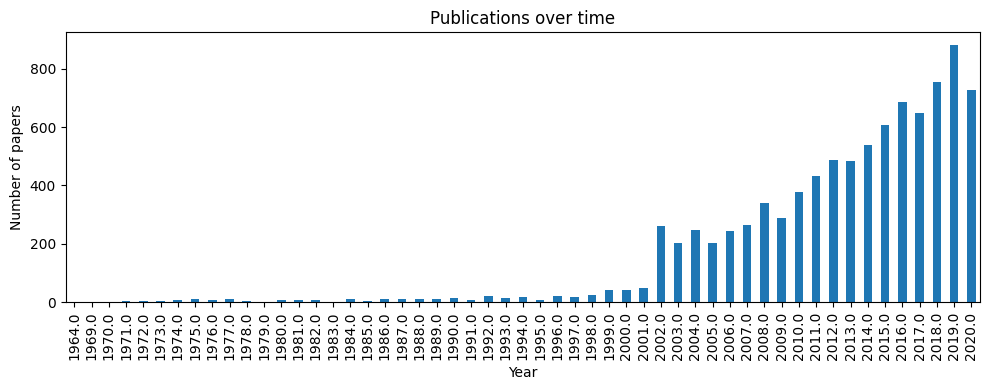

journal
PLoS One              697
Sci Rep               335
Lancet                251
Intensive Care Med    181
Arch Virol            163
Viruses               140
PLoS Pathog           132
Crit Care             128
BMC Infect Dis        128
J Infect Dis          107
Lancet Infect Dis     104
Nucleic Acids Res      95
Emerg Infect Dis       90
Nature                 83
PLoS Negl Trop Dis     78
Name: count, dtype: int64


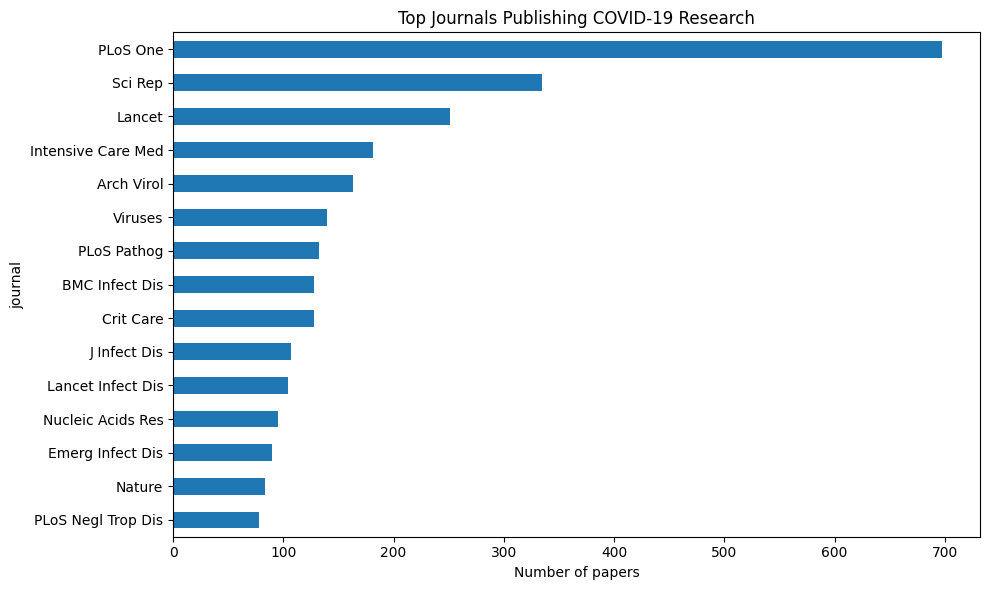

[('and', 875), ('the', 716), ('virus', 355), ('for', 337), ('with', 245), ('influenza', 176), ('infection', 156), ('respiratory', 126), ('from', 118), ('human', 114), ('disease', 113), ('cell', 105), ('patients', 96), ('analysis', 94), ('cells', 84), ('health', 83), ('acute', 80), ('viral', 78), ('protein', 76), ('syndrome', 66)]


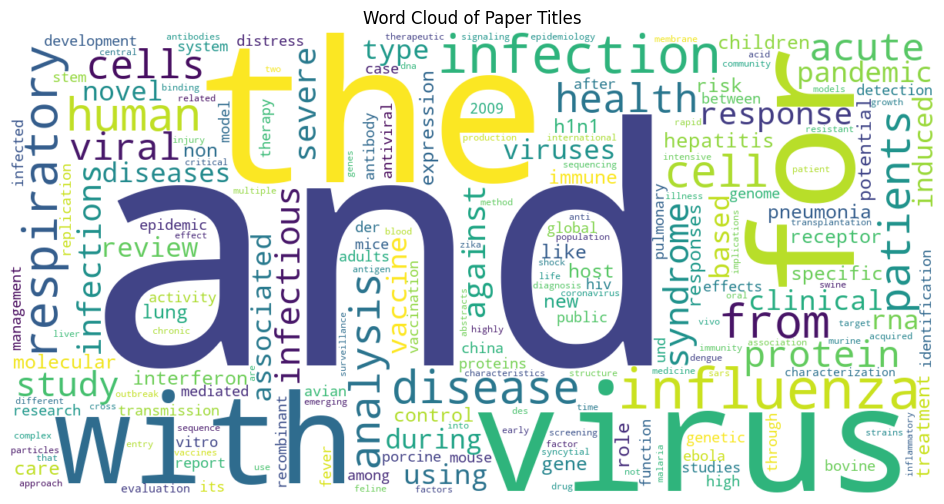

source_x
PMC    10000
Name: count, dtype: int64


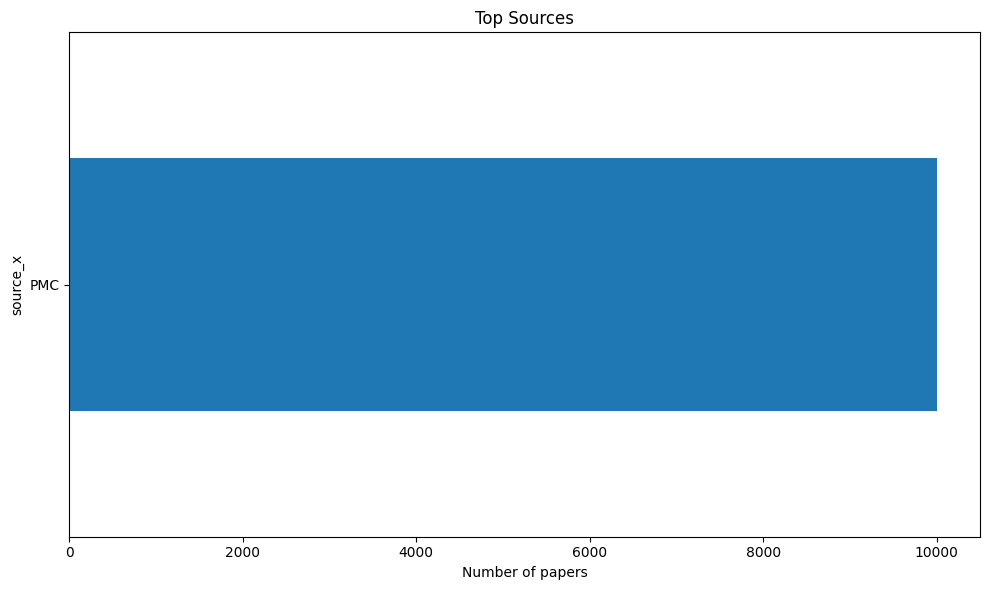

In [14]:
import pandas as pd
import numpy as np 

# PART 1
    #load csv
df = pd.read_csv("Desktop/Metadata/metadata.csv", nrows=10000)

    #Data Structure 
df.info()

    #Preview of First 10 rows
print(df.shape)
df.head(10)

    #Missing values 
df.isnull().sum()

    #summary statistics 
df.describe()

#PART 2 
import pandas as pd

    #load file
df = pd.read_csv("Desktop/Metadata/metadata.csv", low_memory=False, nrows=1000)

import pandas as pd

    #1.--Handle missing files --
df_clean = df.copy()

        #Drop columns with more than 80% missing values
df_clean = df_clean.dropna(thresh=len(df_clean) * 0.2, axis=1)

        #Fill missing 'journal' with "Unknown"
if 'journal' in df_clean.columns:
    df_clean['journal'] = df_clean['journal'].fillna("Unknown")

        #Fill missing 'abstract' with empty string
if 'abstract' in df_clean.columns:
    df_clean['abstract'] = df_clean['abstract'].fillna("")

    #2.--Convert 'publish_time' to datetime--
if 'publish_time' in df_clean.columns:
    df_clean['publish_time'] = pd.to_datetime(
        df_clean['publish_time'].astype(str), errors='coerce'
    )
    #3.--Extract year --
if 'publish_time' in df_clean.columns:
    df_clean['year'] = df_clean['publish_time'].dt.year

    #4.--Create abstract word count--
if 'abstract' in df_clean.columns:
    df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(str(x).split()))

# Quick check
print(df_clean.info())
print(df_clean[['publish_time', 'year', 'abstract_word_count']].head())

#save cleaned file 
df_clean.to_csv("cleaned_metadata.csv", index=False)

#PART 3

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    WORDCLOUD_AVAILABLE = False

df = pd.read_csv("Desktop/Metadata/metadata.csv", nrows=10000)

    
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year

    #Count papers by Publication year
year_counts = df['year'].value_counts().sort_index()
print(year_counts.head(10))

# Plot
plt.figure(figsize=(10,4))
year_counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.title("Publications over time")
plt.tight_layout()
plt.show()

    #Top Journals
top_journals = df['journal'].fillna("Unknown").value_counts().head(15)
print(top_journals)

# Plot
plt.figure(figsize=(10,6))
top_journals.sort_values().plot(kind='barh')
plt.xlabel("Number of papers")
plt.title("Top Journals Publishing COVID-19 Research")
plt.tight_layout()
plt.show()

    #frequent words  in titles
titles = df['title'].dropna().astype(str)

def tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return [w for w in text.split() if len(w) > 2]

counter = Counter()
for t in titles.sample(frac=0.2, random_state=1):  # sample 20% for speed
    counter.update(tokenize(t))

top_words = counter.most_common(20)
print(top_words)

    #Word cloud of paper titles
if WORDCLOUD_AVAILABLE:
    wc = WordCloud(width=1200, height=600, background_color="white").generate_from_frequencies(counter)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Paper Titles")
    plt.show()
else:
    print("⚠️ WordCloud not installed. Run: pip install wordcloud")

    #distibution of paper counts by source

if 'source_x' in df.columns:
    top_sources = df['source_x'].fillna("Unknown").value_counts().head(15)
    print(top_sources)

    plt.figure(figsize=(10,6))
    top_sources.sort_values().plot(kind='barh')
    plt.xlabel("Number of papers")
    plt.title("Top Sources")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'source_x' column found in dataset")








